## 1. Business Understanding

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Preview the first and last rows of the DataFrame
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
# Display the shape of the dataframe
num_rows, num_columns = df.shape
print(f"The number of rows: {num_rows}")
print(f"The number of columns: {num_columns}")


The number of rows: 3333
The number of columns: 21


In [5]:
# Display general statistics for numeric columns
df.describe()



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Display Categorical and Numerical Columns
categorical_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
numerical_columns = df.dtypes[df.dtypes != 'object'].index.tolist()

# Print the results
print("Categorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numerical_columns)


Categorical columns:
['state', 'phone number', 'international plan', 'voice mail plan']

Numerical columns:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


#### Categorical Features:

`state`: The state where the customer resides.

`phone number`: The phone number of the customer.

`international plan`: Whether the customer has an international plan (Yes or No).

`voice mail plan`: Whether the customer has a voice mail plan (Yes or No).

#### Numeric Features:

`area code`: The area code associated with the customer's phone number.

`account length`: The number of days the customer has been an account holder.

`number vmail messages`: The number of voice mail messages received by the customer.

`total day minutes`: The total number of minutes the customer used during the day.

`total day calls`: The total number of calls made by the customer during the day.

`total day charge`: The total charges incurred by the customer for daytime usage.

`total eve minutes`: The total number of minutes the customer used during the evening.

`total eve calls`: The total number of calls made by the customer during the evening.

`total eve charge`: The total charges incurred by the customer for evening usage.

`total night minutes`: The total number of minutes the customer used during the night.

`total night calls`: The total number of calls made by the customer during the night.

`total night charge`: The total charges incurred by the customer for nighttime usage.

`total intl minutes`: The total number of international minutes used by the customer.

`total intl calls`: The total number of international calls made by the customer.

`total intl charge`: The total charges incurred by the customer for international usage.

`customer service calls`: The number of customer service calls made by the customer.

## 3. Data Preparation

### 3.1 Data Cleaning

In [8]:
# Check for missing values
def check_missing_values(df):
    """
    A function to check for missing values in a DataFrame
    """
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        return "There are no missing values"
    else:
        missing_percent = (missing_values / len(df)) * 100
        missing_df = pd.DataFrame({
            'Number of Missing Values': missing_values,
            'Percentage of Missing Values': missing_percent
        })
        missing_df.sort_values(by='Number of Missing Values', ascending=False, inplace=True)
        return missing_df

In [9]:
check_missing_values(df)

'There are no missing values'

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("There are no duplicate rows.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

There are no duplicate rows.


In [11]:
# Convert the data type of the "area code" column to object
df["area code"] = df["area code"].astype(object)

In [12]:
# Dropping the 'phone number' column
df = df.drop("phone number", axis=1)

### 3.2 Exploratory Data Analysis (EDA)

#### `churn` Distribution

In [13]:
df['churn'].unique().tolist()

[False, True]

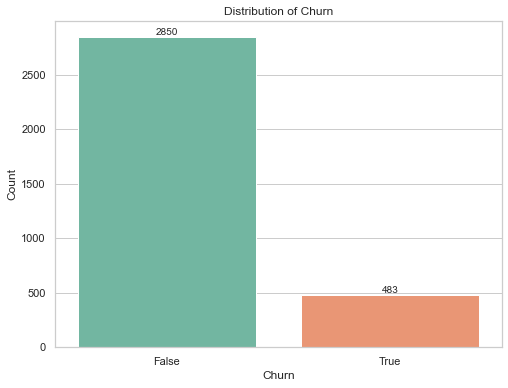

In [14]:
# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar chart
ax = sns.countplot(x="churn", data=df, palette="Set2")

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")

# Annotate the bars with actual count values
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()



#### `area code` Distribution

In [15]:
df['area code'].unique().tolist()

[415, 408, 510]

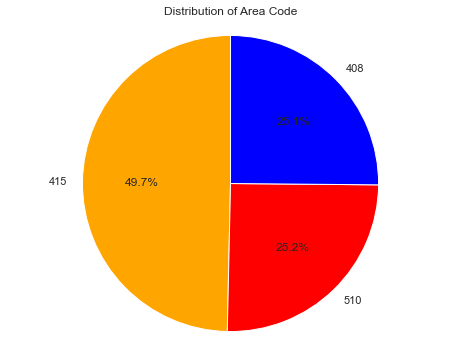

In [16]:
# Calculate the count of each area code
area_code_counts = df["area code"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ["Orange", "Red", "Blue"]  # You can choose your own colors
plt.pie(area_code_counts, labels=area_code_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Area Code")

# Show the plot
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
plt.show()

#### Distribution of Numerical Features

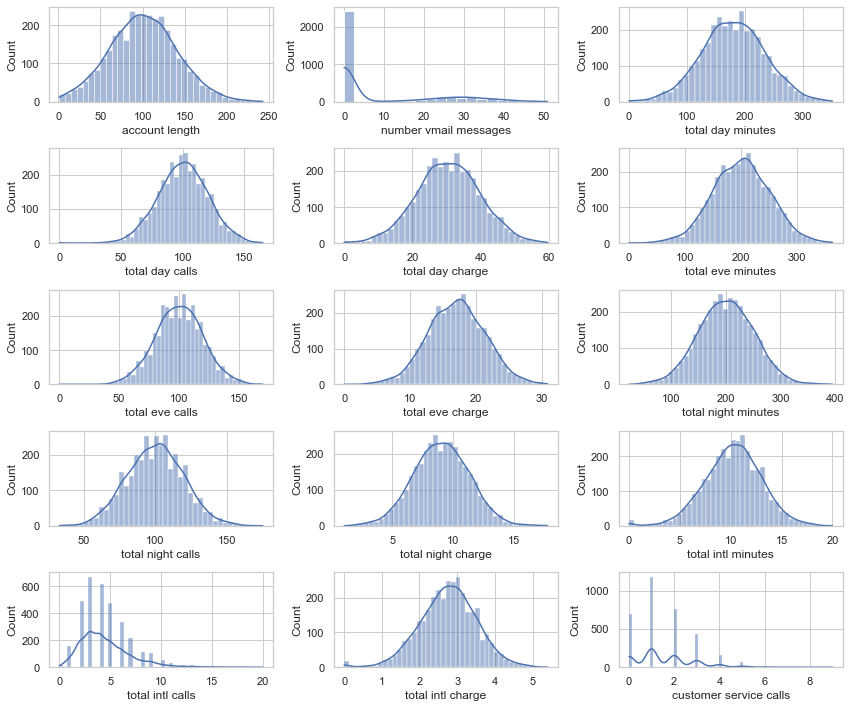

In [17]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

#### Distribution of Categorical Features

In [18]:
print(df['state'].unique().tolist())

['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND']


In [19]:
def plot_categorical_feature(df, categorical_feature):
    """
    Plots a bar chart for a specified categorical feature in the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        categorical_feature (str): The name of the categorical feature to plot.

    Returns:
        None
    """
    # Calculate value counts and sort in descending order
    value_counts = df[categorical_feature].value_counts().sort_values(ascending=False)

    # Create a gradient color palette (reversed order)
    n_categories = len(value_counts)
    color_palette = sns.color_palette("Blues_r", n_categories)

    # Create the bar chart
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)
    plt.title(f"Distribution of {categorical_feature}")
    plt.xlabel(categorical_feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability

    # Annotate the bars with actual count values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

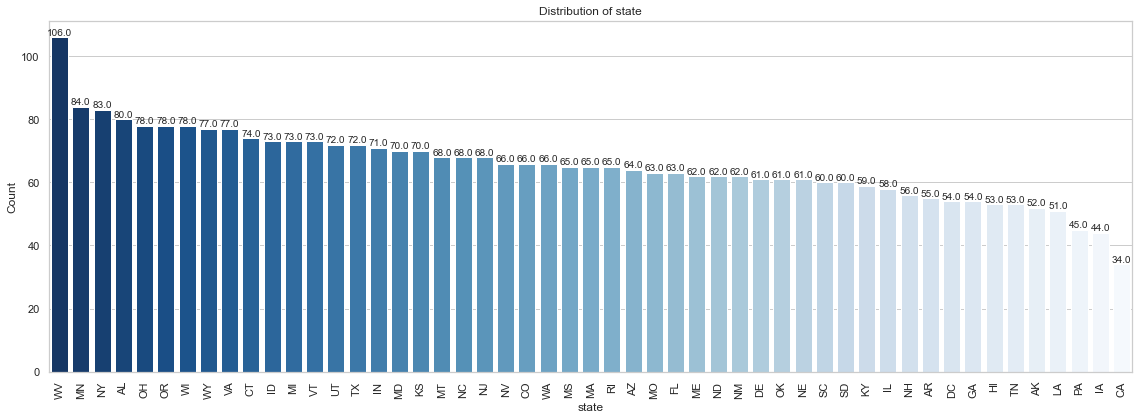

In [20]:
plot_categorical_feature(df, 'state' )

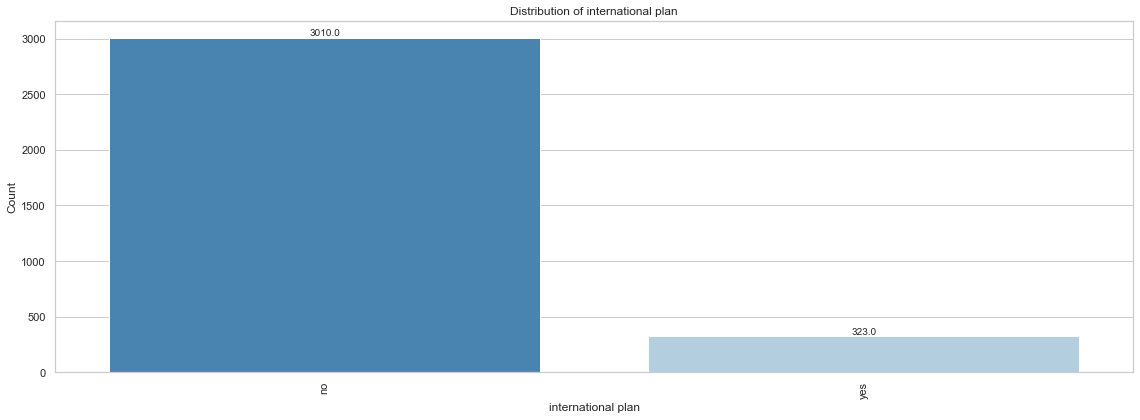

In [21]:
plot_categorical_feature(df, 'international plan' )

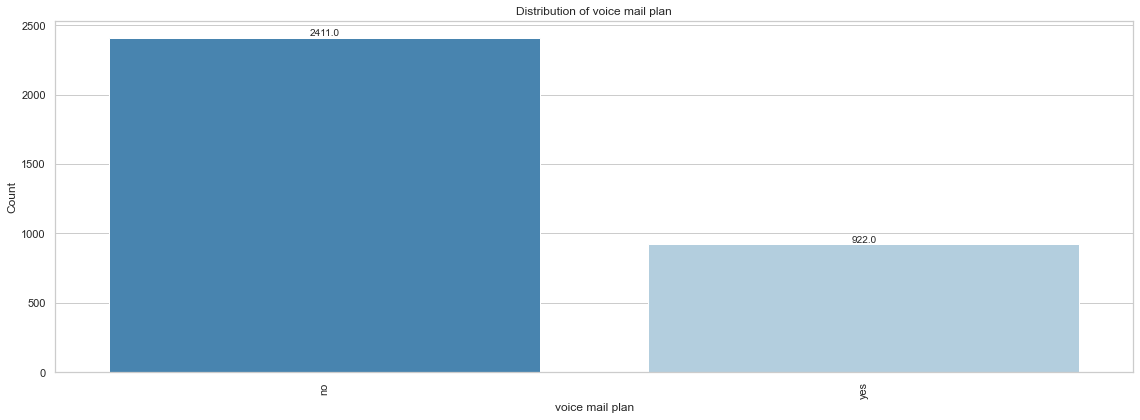

In [22]:
plot_categorical_feature(df, 'voice mail plan' )

#### Distribution of Categorical Features by `churn` rate 

In [23]:
def plot_categorical_by_churn(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(16, 6))
    churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    categories = churn_counts.index.tolist()
    sns.countplot(x=feature, hue="churn", data=data, order=categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

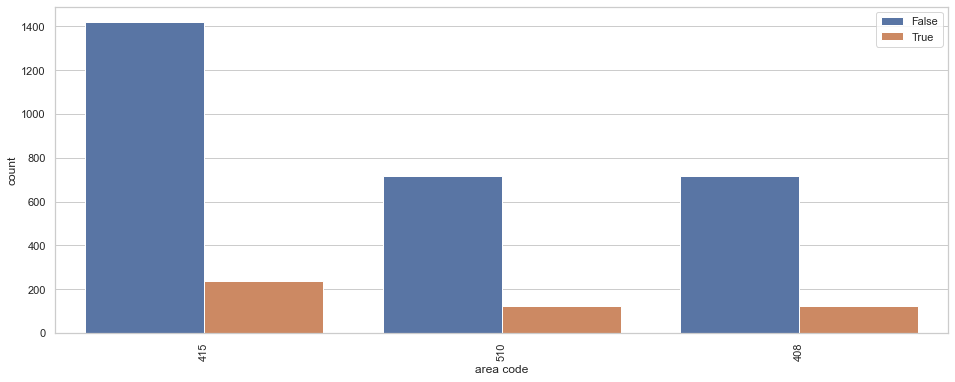

In [24]:
plot_categorical_by_churn(df, 'area code')

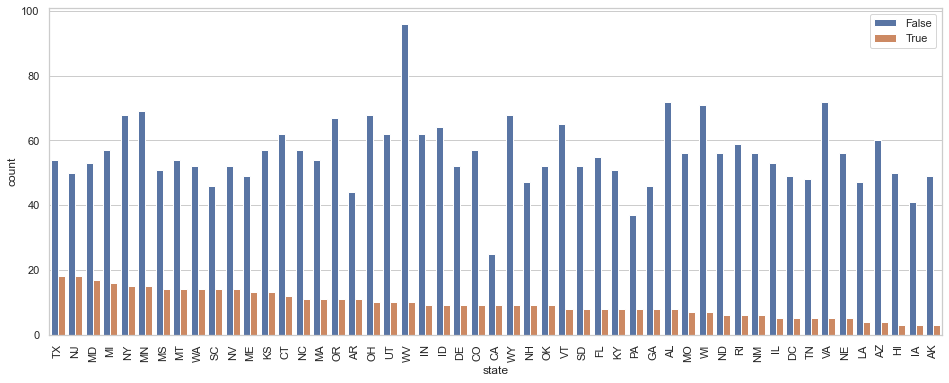

In [25]:
plot_categorical_by_churn(df, 'state')

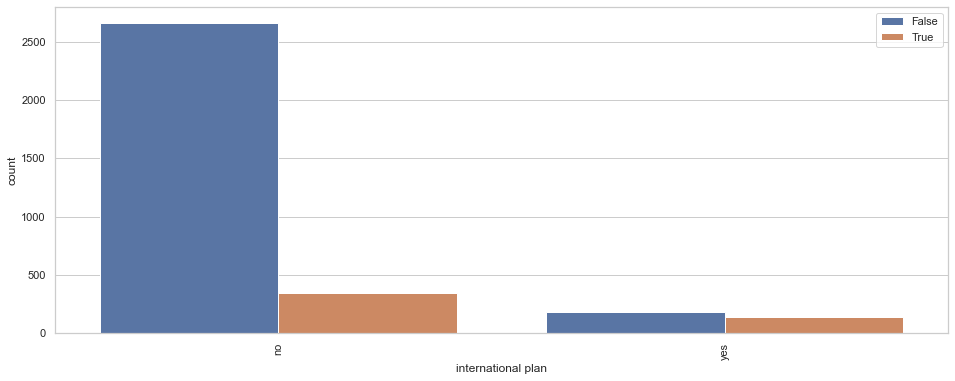

In [26]:
plot_categorical_by_churn(df, 'international plan')

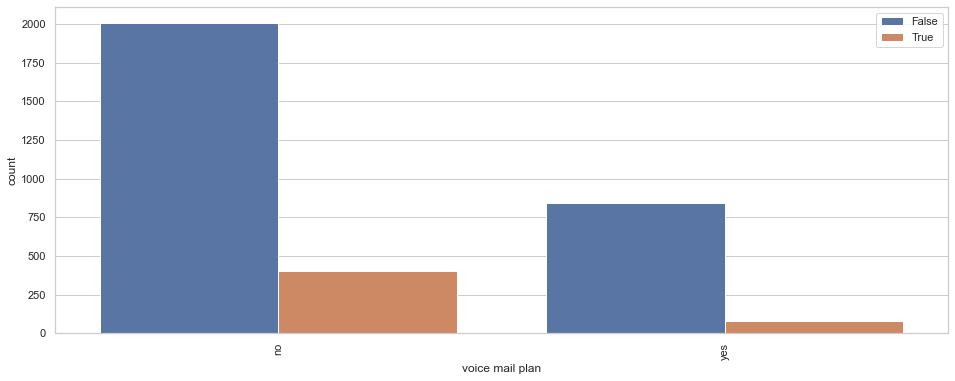

In [27]:
plot_categorical_by_churn(df, 'voice mail plan')

#### Distribution of Churn by day charges

In [28]:

def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate.

    Args:
        data (pd.DataFrame): The input DataFrame.
        x_column (str): The column to plot (e.g., "total day minutes").
        charge_type (str): A description of the charge type (e.g., "Day", "Night", etc.).

    Returns:
        None
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True, palette=["#0072B2", "#009E73"])
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()


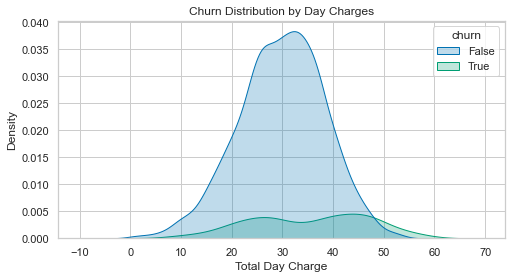

In [29]:
plot_churn_kde(df, 'total day charge', 'Day')

#### Distribution Churn by evening charges

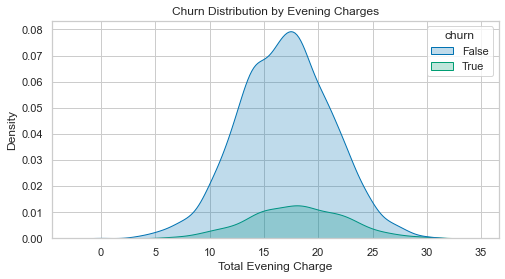

In [30]:
plot_churn_kde(df, 'total eve charge', 'Evening')

#### Distribution Churn by night charges

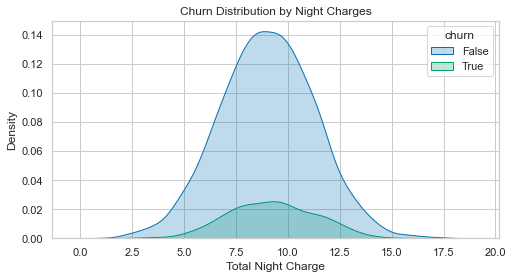

In [31]:
plot_churn_kde(df, 'total night charge', 'Night')

#### Distribution Churn by International Charges

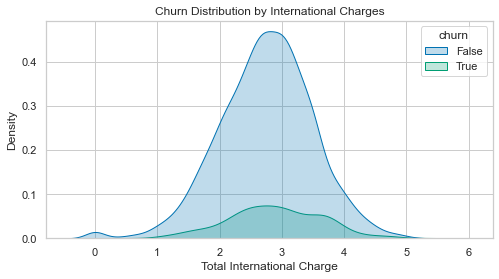

In [32]:
plot_churn_kde(df, 'total intl charge', 'International')

### 3.3 Handling Outliers

In [33]:
def visualize_outliers(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = int(np.ceil(len(numerical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box plot of {col}')
        axes[i].set_ylabel('Value')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


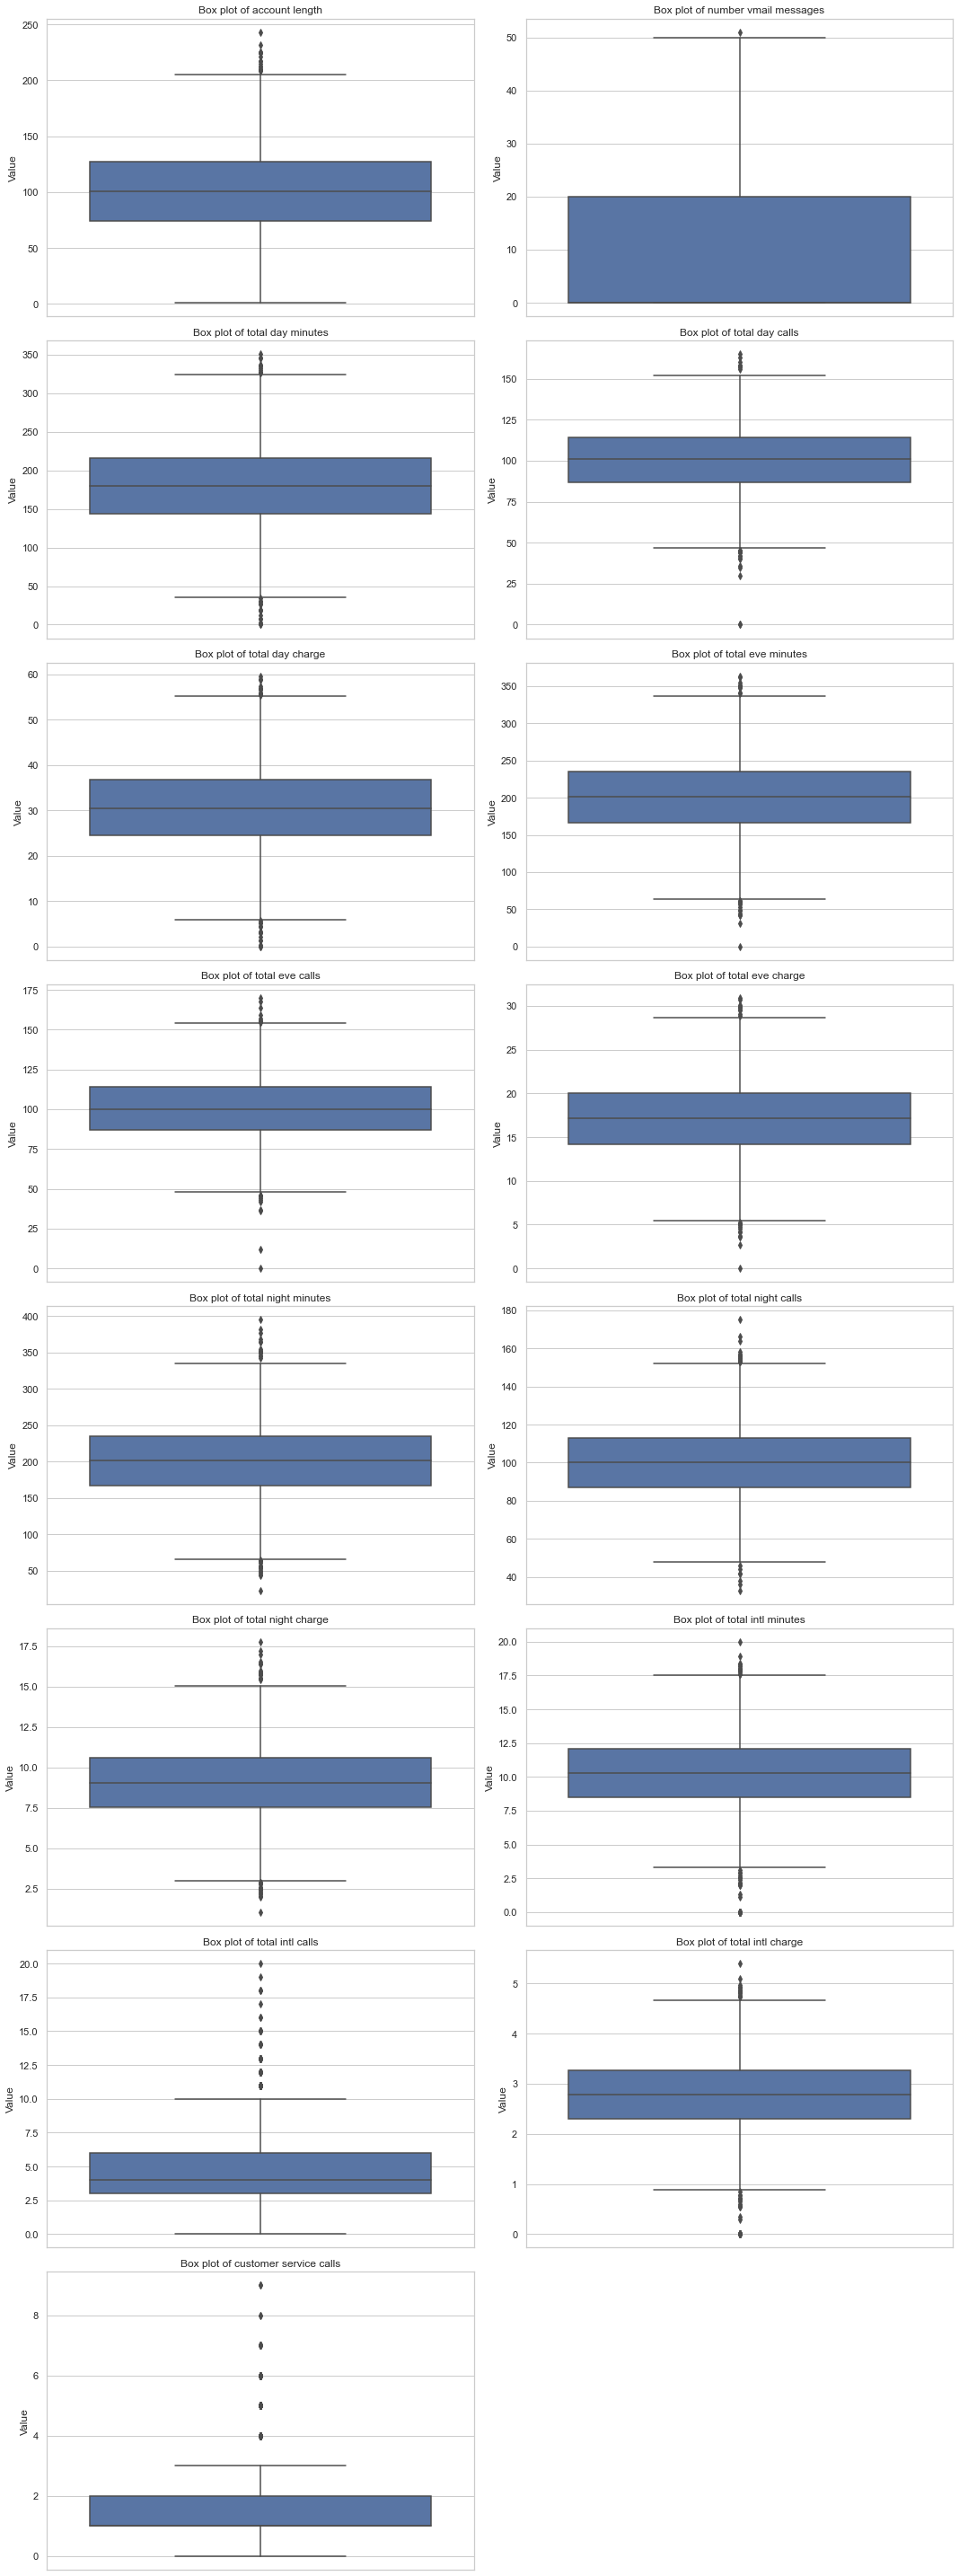

In [34]:
visualize_outliers(df)


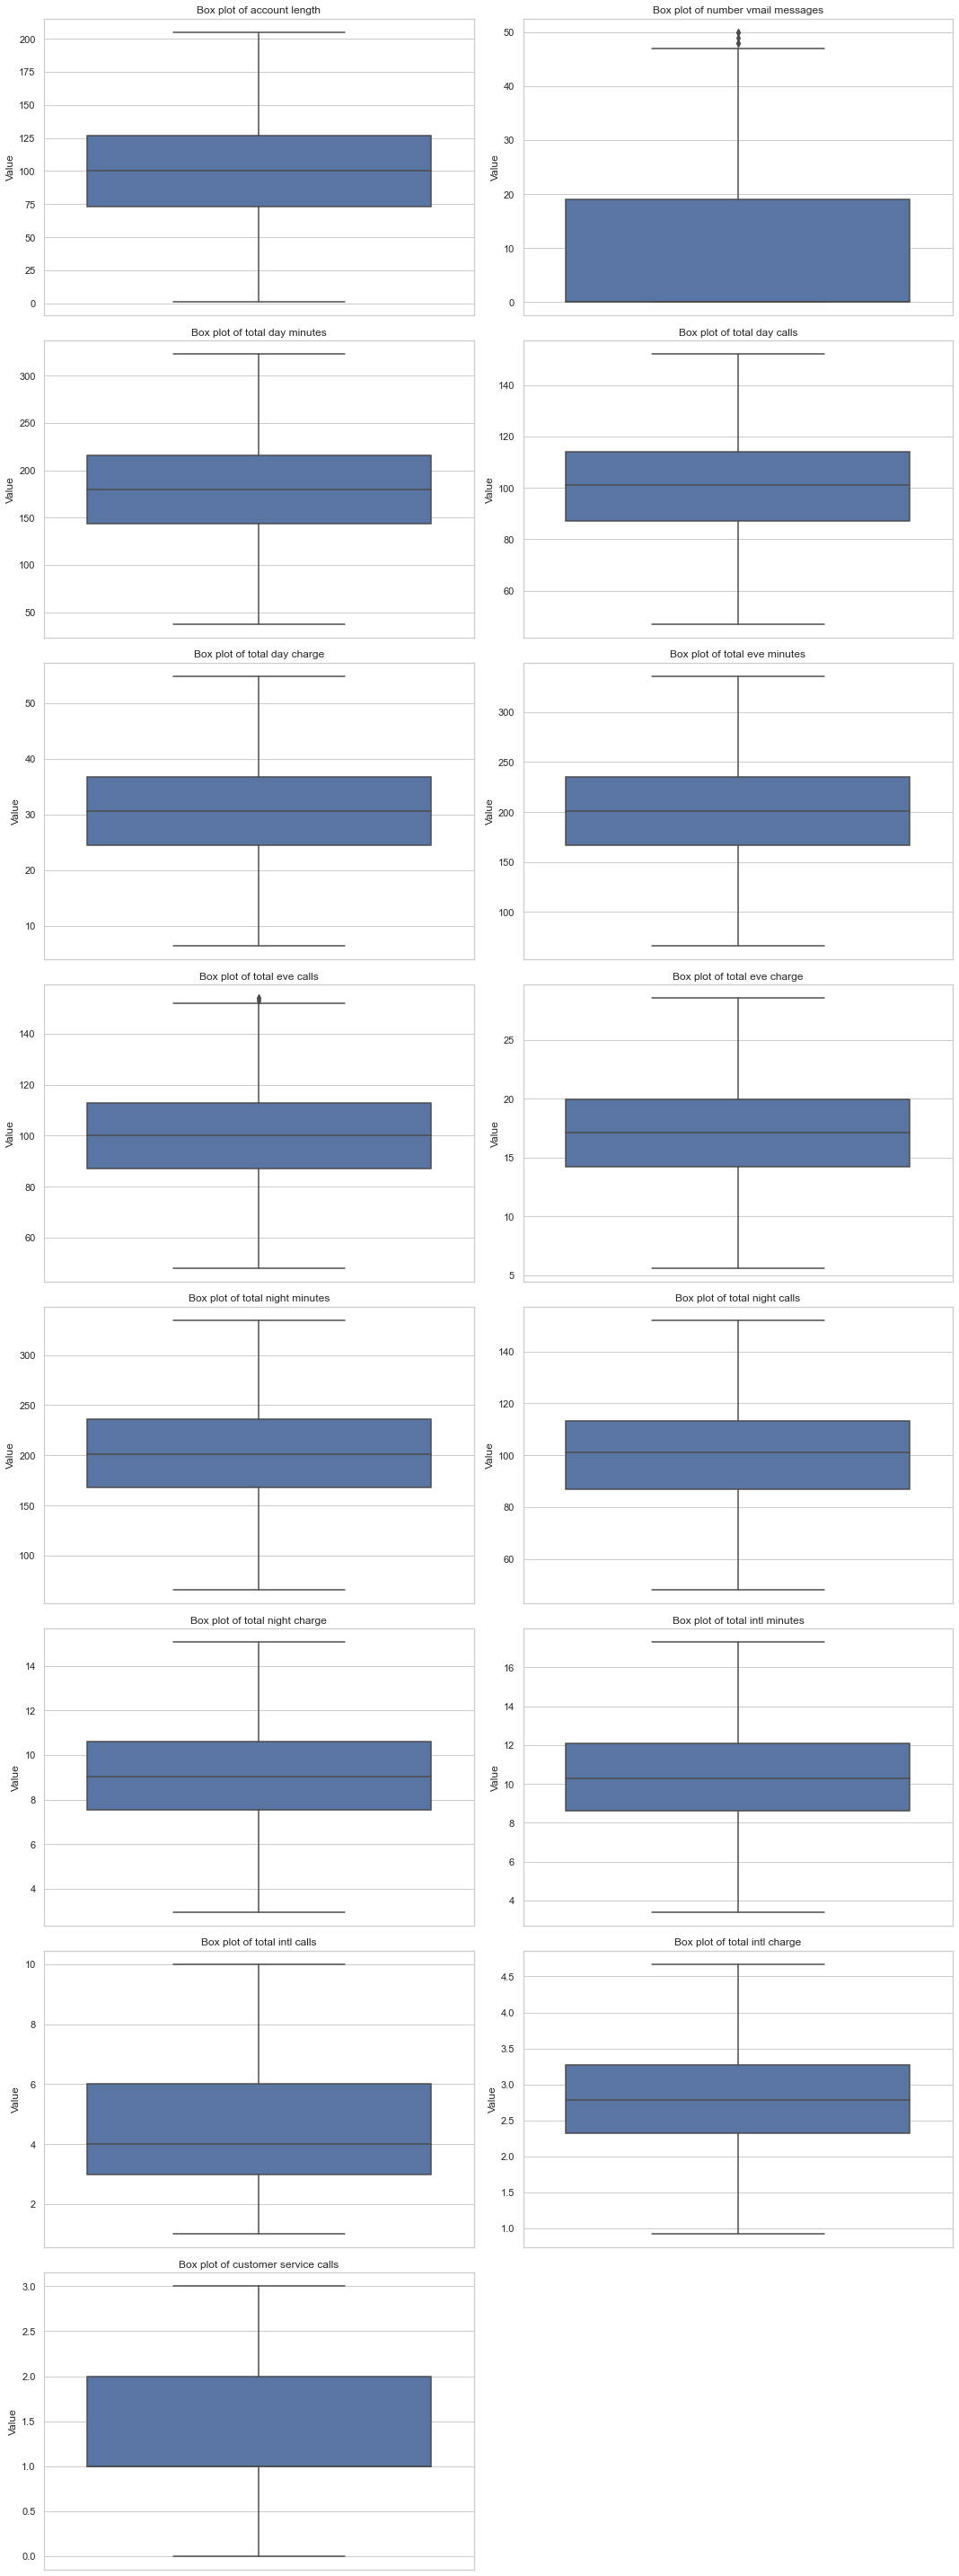

(2797, 20)


In [35]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers from the DataFrame
df = remove_outliers(df, numeric_columns)

# Output the shape of the DataFrame after removing outliers
visualize_outliers(df)
print(df.shape)


### 3.4 Correlation Analysis

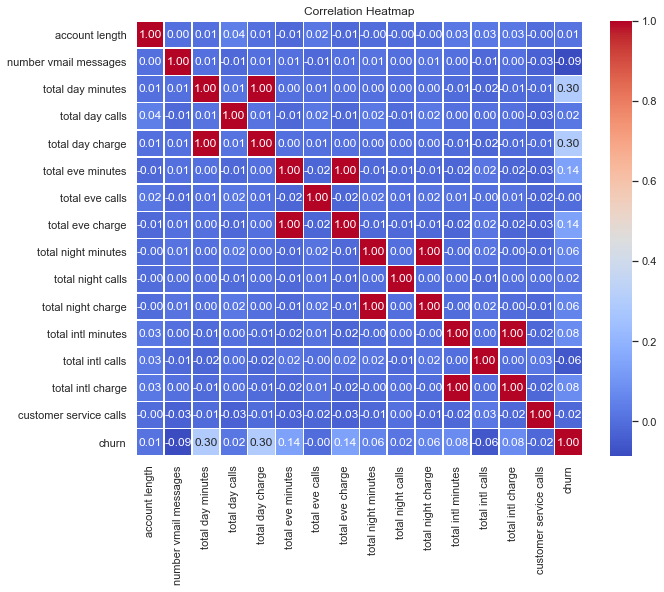

In [36]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Handling Multicollinearity

In [37]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create an upper triangle mask
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Find columns with high correlation (r > 0.90) and display them
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i in range(corr_matrix.shape[0])
                   for j in range(i+1, corr_matrix.shape[1])
                   if corr_matrix.iloc[i, j] > 0.90]

# Display the highly correlated pairs
print("Highly correlated pairs of features (r > 0.90):")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs of features (r > 0.90):
('total day minutes', 'total day charge')
('total eve minutes', 'total eve charge')
('total night minutes', 'total night charge')
('total intl minutes', 'total intl charge')


In [38]:
# Select columns with high correlation to drop
high_corr_cols = set([col for pair in high_corr_pairs for col in pair])

# Drop highly correlated features
df = df.drop(columns=high_corr_cols)

# Output the remaining columns
print("\nRemaining columns after dropping highly correlated features:")
print(df.columns)


Remaining columns after dropping highly correlated features:
Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total eve calls', 'total night calls', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')


## 4. Modelling


## 5. Model Evaluation

## 6. Conclusion